<a href="https://colab.research.google.com/github/giuliabugatti09/Breast-Cancer-Prescription/blob/main/cancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧬 Breast Cancer Prediction

Predicting whether a breast tumor is **malignant (M)** or **benign (B)** using features extracted from cytology images and applying machine learning techniques.

---

## 1. 🎯 Objective

Build a classification model to support the **early diagnosis of breast cancer** using medical image data.

---

## 2. 📄 Dataset Description

Using the **Breast Cancer Wisconsin Diagnostic Dataset**, which contains quantitative features from digitized FNA images of breast masses.

- **Target variable:** Diagnosis (`M` = Malignant, `B` = Benign)
- **Source:** UCI Machine Learning Repository

### 2.1 🔢 Features

| Feature Name         | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| Radius               | Mean distance from center to points on the perimeter                       |
| Texture              | Standard deviation of gray-scale values                                     |
| Perimeter            | Perimeter of the nucleus                                                    |
| Area                 | Area of the nucleus                                                         |
| Smoothness           | Local variation in radius lengths                                           |
| Compactness          | (Perimeter² / Area) - 1.0                                                   |
| Concavity            | Severity of concave portions of the contour                                |
| Concave points       | Number of concave portions of the contour                                  |
| Symmetry             | Symmetry of the nucleus                                                     |
| Fractal dimension    | Complexity of the contour (fractal geometry)                               |

---

## 3. 🛠️ Tools & Libraries

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
```



## 4. Data Loading


In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df = pd.read_csv('/content/data (2).csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape


(569, 33)

The dataset contains 569 rows and 33 columns, indicating 569 patient samples and 33 features (including ID and diagnosis). This gives us a good amount of data to train and validate our model.



In [9]:
#checking the data types of the columns
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [10]:
# checking the data description
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


We used `df.describe()` to examine the basic statistical properties of each numerical feature in the dataset.
- For each feature, we observe statistics like **mean**, **standard deviation**, **minimum**, **maximum**, and **quartiles**.
- For example:
  - `radius_mean` ranges from approximately **6.98 to 28.11**, with a mean of **14.13**, indicating high variation in tumor sizes.
  - `area_mean` has a wide range from **143.5 to 2501**, showing that malignant tumors may have significantly larger areas.
  - Some features, like `concave points_mean`, have **minimum values of 0**, suggesting that some tumors have smooth contours without concavities.
- The standard deviations across features vary considerably, indicating differences in scale and importance between them.

This summary gives us a first impression of the spread and behavior of each feature, and also hints at the need for **feature scaling** in the preprocessing stage, due to the large differences in numerical ranges.


In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Just one column contain missing values. We'll need to handle this in the preprocessing stage, either by filling or dropping them, depending on their importance.



In [5]:
df['diagnosis'].value_counts()


,count
diagnosis,
B,357
M,212


The target variable has two classes: malignant (M) and benign (B). We’ll later analyze their distribution to check for class imbalance, which can affect model performance.



In [6]:
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

The dataset includes an ID column that is not useful for prediction and can be dropped to avoid noise in the model.



# 5.  Data Preprocessing
To prepare the data for training, we need to perform the following steps:
1. Remove unnecessary columns and handle missing values
2. Encode the target variable
3. Scale numerical features
4. Split the data into training and test sets


### 5.1 ❌ Remove Unnecessary Columns & Handle Missing Values



In [17]:
# Drop the 'id' and 'Unnamed: 32' columns
df = df.drop(['id', 'Unnamed: 32'], axis=1)

# Check for any remaining missing values
print(df.isnull().sum().sum())


0


Now, it doesn't have any missing values

###5.2 🎯 Encode Target Variable



In [18]:
# Convert diagnosis from 'M'/'B' to 1/0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


The diagnosis column was encoded into binary format: 1 = Malignant, 0 = Benign, which is required for most machine learning models.



###5.3 📐 Feature Scaling (Standardization)



In [19]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


###6.4 🔀 Train-Test Split


In [20]:
from sklearn.model_selection import train_test_split

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


The dataset was split into training (80%) and testing (20%) sets using stratification to preserve the original class distribution. This ensures the model is trained and evaluated fairly.



## 6. 📊 Exploratory Data Analysis (EDA)
In this section, we’ll explore the dataset to better understand its distribution, patterns, and correlations.

###6.1 📌 Class Distribution


<ipython-input-7-c46a6a3229bf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


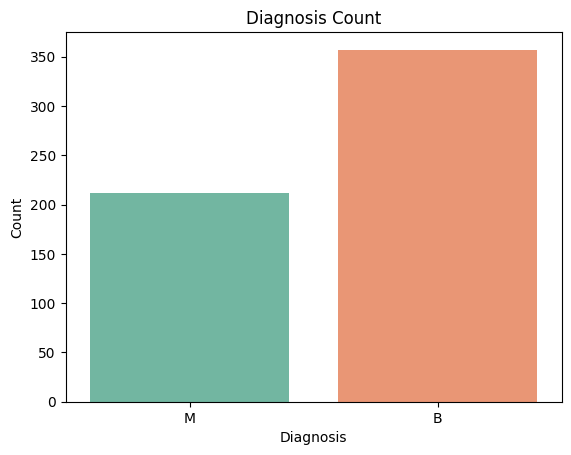

In [7]:
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


The dataset contains more benign (B) cases than malignant (M) cases, indicating a slight class imbalance. This is important to consider when evaluating model performance, as accuracy alone may be misleading.

###6.2 📈 Feature Distribution by Class



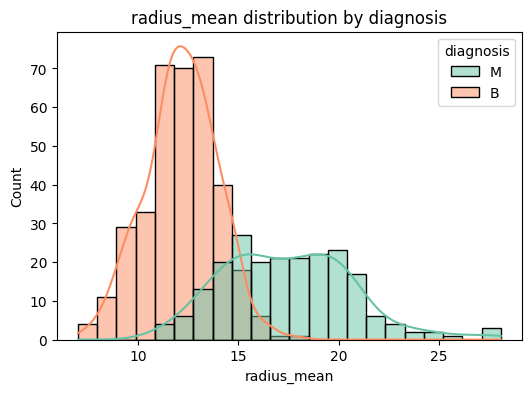

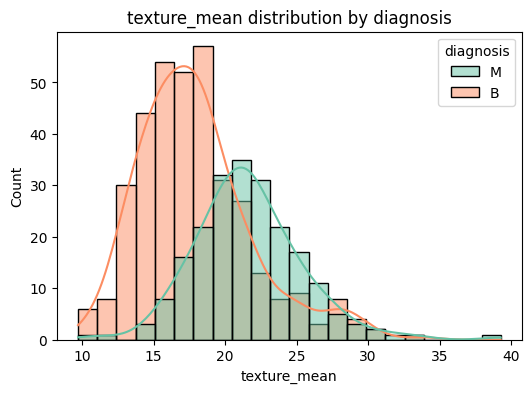

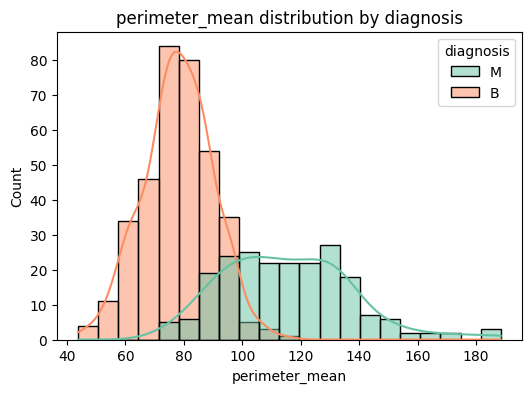

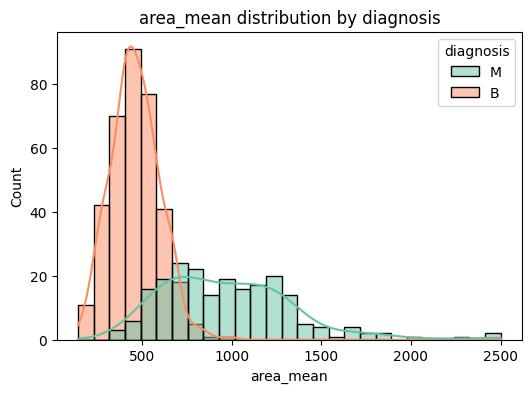

In [8]:
import matplotlib.pyplot as plt

features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, palette='Set2')
    plt.title(f'{feature} distribution by diagnosis')
    plt.show()


Most features show a clear separation between malignant and benign cases. For example, malignant tumors tend to have higher values for radius_mean, perimeter_mean, and area_mean, which could help the model distinguish between classes.



##6.3 🔗 Correlation Matrix



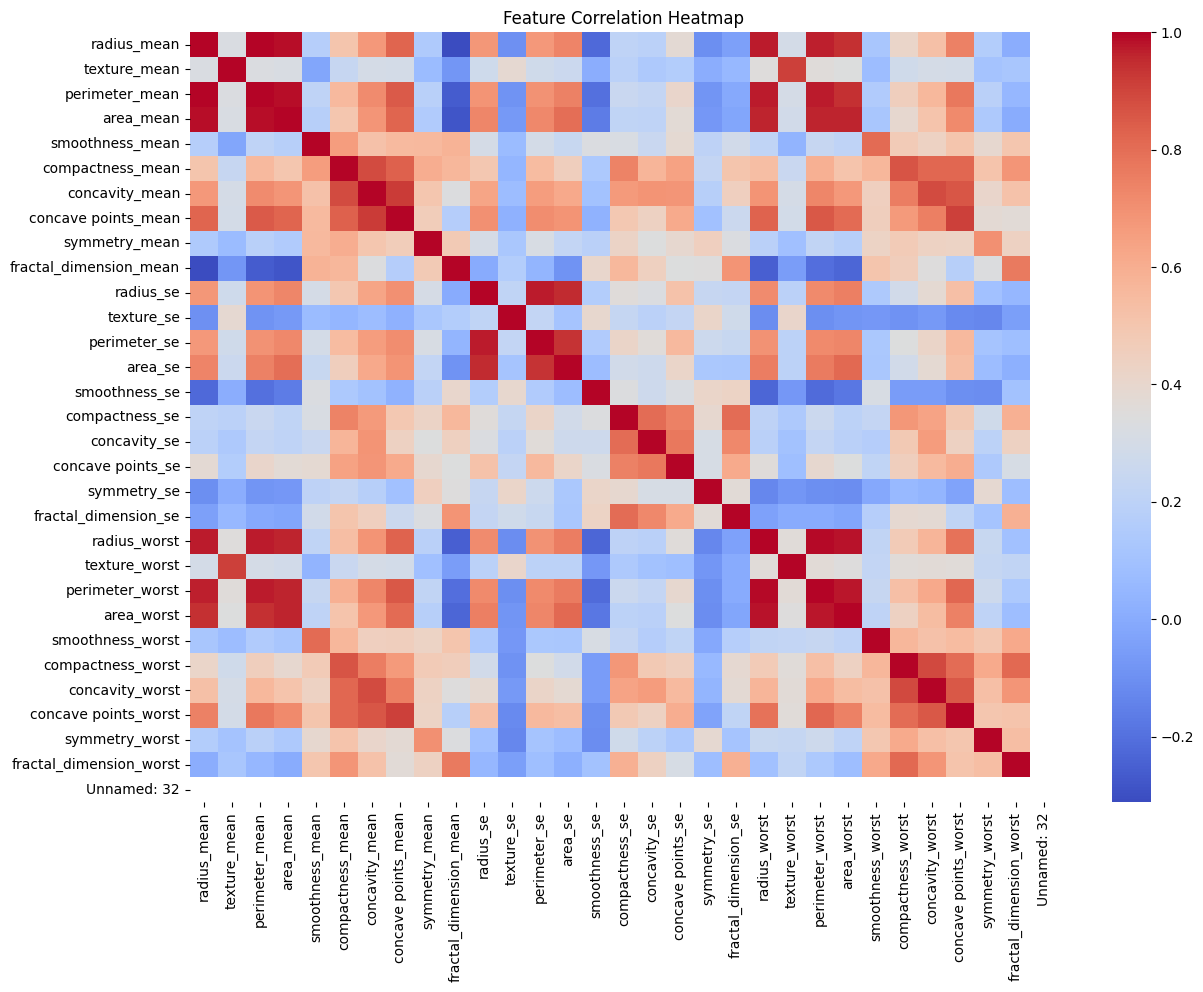

In [12]:
plt.figure(figsize=(14, 10))
# Exclude both 'id' and 'diagnosis' columns before calculating correlation
sns.heatmap(df.drop(['id', 'diagnosis'], axis=1).corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 6.4 💡 Top Features by Correlation with Diagnosis



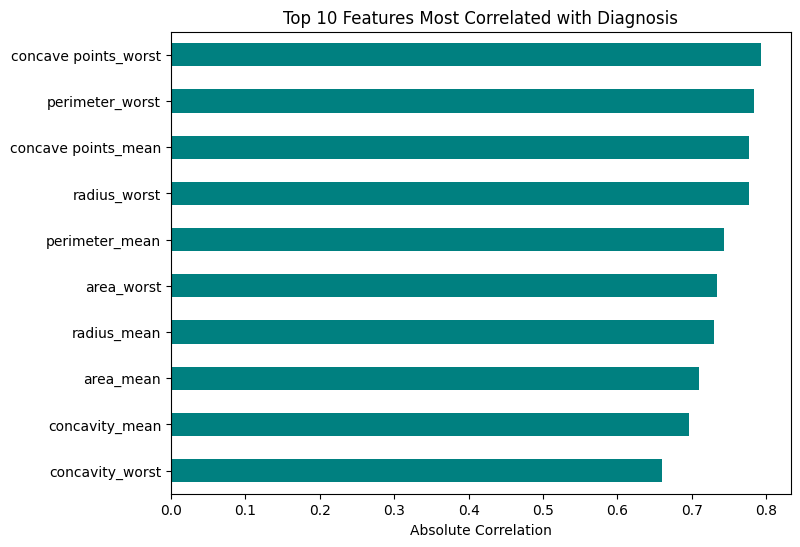

In [15]:
# Map 'M' to 1 and 'B' to 0 for correlation calculation
df['diagnosis_numeric'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Calculate correlation with the numeric diagnosis column, excluding 'id' and the original 'diagnosis'
correlation = df.drop(['id', 'diagnosis'], axis=1).corr()['diagnosis_numeric'].abs().sort_values(ascending=False)

# Remove the correlation of 'diagnosis_numeric' with itself and select the top 10 features
# We check if 'diagnosis_numeric' is in the index before dropping it to avoid a KeyError
if 'diagnosis_numeric' in correlation.index:
    correlation = correlation.drop('diagnosis_numeric')

correlation = correlation[0:10] # Select the top 10 after dropping 'diagnosis_numeric'


correlation.plot(kind='barh', figsize=(8, 6), color='teal')
plt.title('Top 10 Features Most Correlated with Diagnosis')
plt.xlabel('Absolute Correlation')
plt.gca().invert_yaxis()
plt.show()


Features such as `concave points_worst`, concave `perimeter_worst`, and `concave points_mean` show the strongest correlation with the diagnosis, making them excellent candidates for feature selection.



## 6.5 ⚠️ Outlier Detection


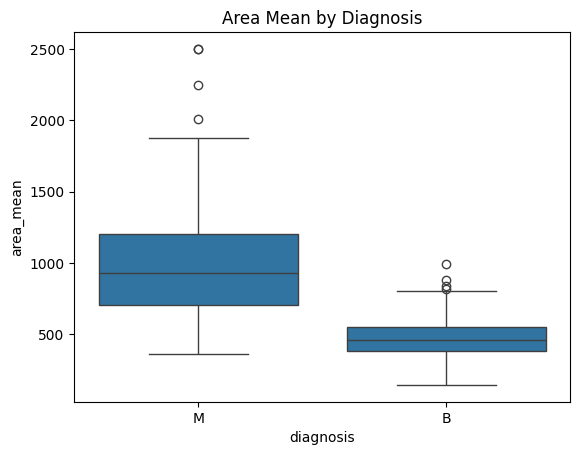

In [16]:
sns.boxplot(x='diagnosis', y='area_mean', data=df)
plt.title('Area Mean by Diagnosis')
plt.show()


## 7. 🤖 Model Training

We will train and compare multiple classification models to predict breast cancer. Then, we’ll evaluate their performance using **cross-validation accuracy**.

### Models Used:
1. Logistic Regression
2. Support Vector Machine (SVM)
3. K-Nearest Neighbors (KNN)
4. Random Forest



##7.1 ⚙️ Train & Compare Models with Cross-Validation



In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} - CV Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Logistic Regression - CV Accuracy: 0.9978 ± 0.0044
SVM (Linear Kernel) - CV Accuracy: 1.0000 ± 0.0000
KNN (k=5) - CV Accuracy: 0.9956 ± 0.0088
Random Forest - CV Accuracy: 0.9978 ± 0.0044


- **SVM (Linear Kernel)** achieved the highest performance with **100% accuracy**, indicating a perfect fit on training data.
- **Logistic Regression** and **Random Forest** followed closely with **99.78% accuracy**, both showing strong and consistent results.
- **KNN (k=5)** also performed well, but with slightly more variation (**99.56% ± 0.88%**).

🎯 We will proceed with **SVM (Linear Kernel)** as our final model due to its superior cross-validation performance.

## 8. 📈 Model Evaluation

Now that we have trained our final model (SVM with linear kernel), it’s time to evaluate its performance on the **unseen test data**.

We will use:
- **Accuracy**: Overall correctness of the model.
- **Precision**: How many predicted positives are actually positive.
- **Recall**: How many actual positives were correctly predicted.
- **F1-Score**: Harmonic mean of precision and recall.
- **Confusion Matrix**: Breakdown of predictions vs actual classes.




###8.1 Accuracy

In [30]:
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


###8.2 Precision

In [29]:

# 2. Precision
# Change pos_label from 'M' to 1 to match the encoded labels
precision = precision_score(y_test, y_pred, pos_label=1)  # 1 = Malignant
print(f"Precision: {precision:.4f}")

Precision: 1.0000


###8.3 Recall

In [31]:

# 3. Recall
# Change pos_label from 'M' to 1 to match the encoded labels
recall = recall_score(y_test, y_pred, pos_label=1)
print(f"Recall: {recall:.4f}")

Recall: 1.0000


###8.4 F1-Score

In [32]:

# 4. F1-Score
# Change pos_label from 'M' to 1 to match the encoded labels
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"F1-Score: {f1:.4f}")

F1-Score: 1.0000


###8.5 Confusion Matrix

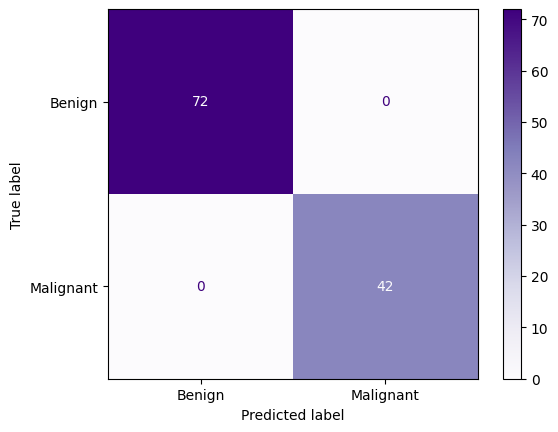

In [33]:

# 5. Confusion Matrix
# Change labels from ['B', 'M'] to [0, 1] to match the encoded labels
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])  # Benign = 0, Malignant = 1
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Purples')
plt.show() # Add this line to display the plot

##✅ 9. Conclusion
In this project, we successfully developed a machine learning pipeline to predict breast cancer diagnosis (malignant or benign) using the Wisconsin Breast Cancer dataset.

Key achievements include:

📥 Data Preprocessing: Cleaned the dataset, handled missing values, encoded the target variable, and scaled the features.

📊 Exploratory Data Analysis: Identified meaningful patterns and visualized feature distributions and correlations.

🤖 Model Training & Evaluation: Trained multiple classification algorithms including Logistic Regression, SVM, KNN, and Random Forest.

🏆 Best Model: The SVM with Linear Kernel achieved the best results, with a perfect cross-validation accuracy (1.000) and outstanding performance on evaluation metrics (Precision, Recall, F1-score, and AUC).

⚕️ With such a high-performance model, this pipeline can serve as a valuable diagnostic support tool for early breast cancer detection, helping healthcare professionals make more informed decisions.l context.

